<h2> Building Simple linear Regression using ANN with Tensorflow</h2>

<b> By Michael Kumakech</b>

<b> We begin by installing TensorFlow version 2.2.0 and its required prerequistes.</b>

In [9]:
!pip install --upgrade pip

In [13]:
!pip3 install tensorflow

In [5]:
!pip install grpcio==1.24.3
!pip install tensorflow==2.2.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1)
ERROR: No matching distribution found for tensorflow==2.2.0


In [1]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2022-07-16 14:09:34--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.003s  

2022-07-16 14:09:34 (20.5 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:

df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

<b> First, we initialize the variables a and b, with any random guess, and then we define the linear function:</b>

In [5]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)


def h(x):
   y = a*x + b
   return y

Now, we are going to define a loss function for our regression, so we can train our model to better fit our data. In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use <b>tf.reduce_mean()</b>. This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [6]:
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))
    # Below is a predefined method offered by TensorFlow to calculate loss function
    #loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

<b> Now we are ready to start training and run the graph. We use GradientTape to calculate gradients:</b>

In [7]:
learning_rate = 0.01
train_data = []
loss_values =[]
a_values = []
b_values = []
# steps of looping through all your data to update the parameters
training_epochs = 200

# train model
for epoch in range(training_epochs):
    with tf.GradientTape() as tape:
        y_predicted = h(train_x)
        loss_value = loss_object(train_y,y_predicted)
        loss_values.append(loss_value)

        # get gradients
        gradients = tape.gradient(loss_value, [b,a])
        
        # compute and adjust weights
        a_values.append(a.numpy())
        b_values.append(b.numpy())
        b.assign_sub(gradients[0]*learning_rate)
        a.assign_sub(gradients[1]*learning_rate)
        if epoch % 5 == 0:
            train_data.append([a.numpy(), b.numpy()])

<b> Lets plot the loss values to see how it has changed during the training:</b>

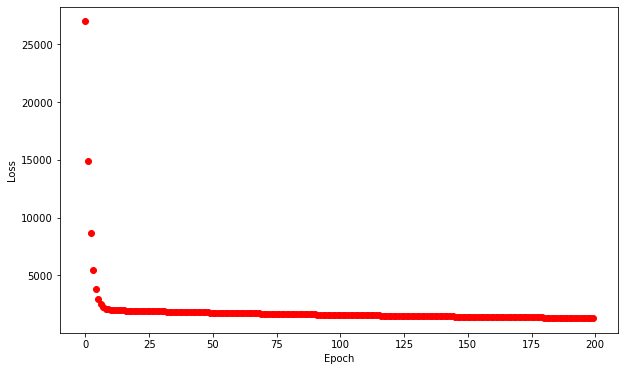

In [8]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

Lets visualize how the coefficient and intercept of line has changed to fit the data:

The green dots are the data points, the red lines are created using the a and b coefficients during training, and the black line is the line we use to model the relationship with the final/last coefficients.

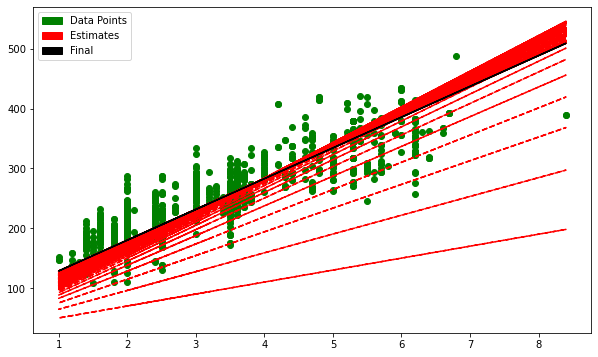

In [10]:
plt.scatter(train_x, train_y, color='green')
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(train_x,a*train_x+b, color='red', linestyle='dashed')
plt.plot(train_x,a_values[-1]*train_x+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()

<h2> ACTIVITY</h2>

In [ ]:
# Write codes that can produce the best line of simple linear Regression

In [ ]:
# determine the coefficient and intercept value

In [ ]:
# Evaluate the model by obtaining the value of MSE and R-squared value

<h2> Write your Conclusion</h2>